<a href="https://colab.research.google.com/github/anuragbisht12/Machine-Learning-Algorithms/blob/master/DecisonTrees_And_XGB_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import  pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [30]:
df=pd.read_csv('/content/sample_data/Salary.csv',index_col='id')
df.head()
df1=df

In [3]:
df.columns

Index(['year', 'college', 'location', 'salary'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 1 to 44
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      44 non-null     int64 
 1   college   44 non-null     int64 
 2   location  44 non-null     object
 3   salary    44 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [5]:
df.isna().sum()

year        0
college     0
location    0
salary      0
dtype: int64

In [6]:
df.nunique()

year         5
college      3
location     2
salary      29
dtype: int64

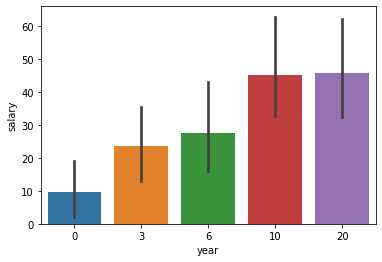

In [12]:
sns.barplot(df['year'],df['salary'])

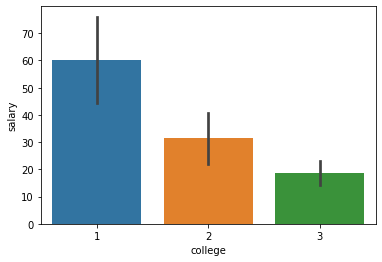

In [13]:
sns.barplot(df['college'],df['salary'])

In [33]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df1['city_labelled']=le.fit_transform(df1['location'])

df1


,year,college,location,salary,city_labelled
id,,,,,
1,0,1,bangalore,30,0
2,0,1,delhi,20,1
3,0,2,bangalore,3,0
4,0,2,delhi,3,1
5,0,3,bangalore,1,0
6,0,3,delhi,1,1
7,3,1,bangalore,50,0
8,3,1,delhi,30,1
9,3,1,bangalore,40,0


In [34]:
from sklearn.model_selection import train_test_split

df1.drop(['location'],axis=1, inplace=True)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df1[['year','college','city_labelled']], df1['salary'], test_size=0.2, random_state=42)

In [37]:
from sklearn.tree import DecisionTreeRegressor

dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
y_pred=dr.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error,r2_score

print(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred))

57.68055555555556 0.780052490349308


In [42]:
y_pred

array([26.25, 35.  , 35.  , 50.  , 50.  , 26.25,  1.  , 15.  , 50.  ])

In [47]:
# years, college tier, location 0:bangalore, 1:delhi
dr.predict([[5,2,1]]).tolist()

[15.0]

In [56]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(X_train.values,y_train.values)

[12:34:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [57]:
y_pred_xgb=xgb.predict(X_test.values)

In [58]:
print(mean_squared_error(y_test,y_pred_xgb),r2_score(y_test,y_pred_xgb))

52.919668642204364 0.7982067055824049


In [59]:
# years, college tier, location 0:bangalore, 1:delhi
xgb.predict([[5,2,1]]).tolist()

[16.694875717163086]